Insurance Data Analysis

Importing necessary libraries

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
plt.style.use('ggplot')

import sys
import os

In [3]:
import warnings
warnings.filterwarnings('ignore', category=UserWarning)

In [4]:
data = pd.read_csv('../data/MachineLearningRating_v3.txt', sep = '|')

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20500\1693273759.py:1: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('../data/MachineLearningRating_v3.txt', sep = '|')


In [5]:
data.to_csv('../data/dataset.csv', index=False)

In [11]:
data.head()

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


In [12]:
data.describe()

,UnderwrittenCoverID,PolicyID,PostalCode,mmcode,RegistrationYear,Cylinders,cubiccapacity,kilowatts,NumberOfDoors,CustomValueEstimate,NumberOfVehiclesInFleet,SumInsured,CalculatedPremiumPerTerm,TotalPremium,TotalClaims
count,1.000098e+06,1.000098e+06,1.000098e+06,9.995460e+05,1.000098e+06,999546.000000,999546.000000,999546.000000,999546.000000,2.204560e+05,0.0,1.000098e+06,1.000098e+06,1.000098e+06,1.000098e+06
mean,1.048175e+05,7.956682e+03,3.020601e+03,5.487770e+07,2.010225e+03,4.046642,2466.743258,97.207919,4.019250,2.255311e+05,NaN,6.041727e+05,1.178757e+02,6.190550e+01,6.486119e+01
std,6.329371e+04,5.290039e+03,2.649854e+03,1.360381e+07,3.261391e+00,0.294020,442.800640,19.393256,0.468314,5.645157e+05,NaN,1.508332e+06,3.997017e+02,2.302845e+02,2.384075e+03
min,1.000000e+00,1.400000e+01,1.000000e+00,4.041200e+06,1.987000e+03,0.000000,0.000000,0.000000,0.000000,2.000000e+04,NaN,1.000000e-02,0.000000e+00,-7.825768e+02,-1.200241e+04
25%,5.514300e+04,4.500000e+03,8.270000e+02,6.005692e+07,2.008000e+03,4.000000,2237.000000,75.000000,4.000000,1.350000e+05,NaN,5.000000e+03,3.224800e+00,0.000000e+00,0.000000e+00
50%,9.408300e+04,7.071000e+03,2.000000e+03,6.005842e+07,2.011000e+03,4.000000,2694.000000,111.000000,4.000000,2.200000e+05,NaN,7.500000e+03,8.436900e+00,2.178333e+00,0.000000e+00
75%,1.391900e+05,1.107700e+04,4.180000e+03,6.005842e+07,2.013000e+03,4.000000,2694.000000,111.000000,4.000000,2.800000e+05,NaN,2.500000e+05,9.000000e+01,2.192982e+01,0.000000e+00
max,3.011750e+05,2.324600e+04,9.870000e+03,6.506535e+07,2.015000e+03,10.000000,12880.000000,309.000000,6.000000,2.655000e+07,NaN,1.263620e+07,7.442217e+04,6.528260e+04,3.930921e+05


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 52 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   UnderwrittenCoverID       1000098 non-null  int64  
 1   PolicyID                  1000098 non-null  int64  
 2   TransactionMonth          1000098 non-null  object 
 3   IsVATRegistered           1000098 non-null  bool   
 4   Citizenship               1000098 non-null  object 
 5   LegalType                 1000098 non-null  object 
 6   Title                     1000098 non-null  object 
 7   Language                  1000098 non-null  object 
 8   Bank                      854137 non-null   object 
 9   AccountType               959866 non-null   object 
 10  MaritalStatus             991839 non-null   object 
 11  Gender                    990562 non-null   object 
 12  Country                   1000098 non-null  object 
 13  Province                  1

In [5]:
data.dtypes.value_counts()

object     36
float64    11
int64       4
bool        1
Name: count, dtype: int64

In [6]:
# Changing WrittenOff to Bool 
data ['WrittenOff'] = data['WrittenOff'].apply(lambda x: True if x == 'Yes' else (False if x == 'No' else None))

In [7]:
# Changing NewVehicle to Bool 
data ['NewVehicle'] = data['NewVehicle'].apply(lambda x: True if x == 'More than 6 months' else (False if x == 'Less than 6 months' else None))

In [8]:
# Changing AlarmImmobiliser to Bool 
data ['AlarmImmobiliser'] = data['AlarmImmobiliser'].apply(lambda x: True if x == 'Yes' else (False if x == 'No' else None))

In [9]:
# Changing TrackingDevice to Bool 
data['TrackingDevice'] = data['TrackingDevice'].apply(lambda x: True if x == 'Yes' else (False if x == 'No' else None))

In [10]:
# Changing Rebuilt column bool
data['Rebuilt'] = data['Rebuilt'].apply(lambda x: True if x == 'Yes' else(False if x == 'No' else None))

In [11]:
# Changing Converted column to bool
data['Converted'] = data['Converted'].apply(lambda x: True if x == 'Yes' else(False if x == 'No' else None))

In [12]:
# Changing the CrossBorder Column to bool
data['CrossBorder'] = data['CrossBorder'].apply(lambda x: True if x == 'Yes' else(False if x == 'No' else None))

Changing to Int

In [14]:
data['NumberOfDoors'] = data['NumberOfDoors'].astype('Int64')
data['Cylinders'] = data['Cylinders'].astype('Int64')
data['mmcode'] = data['mmcode'].astype('Int64')
data['UnderwrittenCoverID'] = data['UnderwrittenCoverID'].astype('Int64')
data['PolicyID'] = data['PolicyID'].astype('Int64')
data['PostalCode'] = data['PostalCode'].astype('Int64')
data['RegistrationYear'] = data['RegistrationYear'].astype('Int64')
data['cubiccapacity'] = data['cubiccapacity'].astype('Int64')
data['kilowatts'] = data['kilowatts'].astype('Int64')

Columns to Float

In [16]:
data['CapitalOutstanding'].value_counts().head()

CapitalOutstanding
0         665918
0         122199
0.00        4663
232500      3285
329500      3244
Name: count, dtype: int64

In [17]:
print(data['CapitalOutstanding'].dtypes)

object


In [18]:
# Changing CapitalOutstanding to float
data.CapitalOutstanding = data.CapitalOutstanding.apply(lambda x: float(x.replace(',', '')) if isinstance(x, str) else x )
print(data['CapitalOutstanding'].dtypes)

float64


Columns to datetime

In [19]:
# changing the columns to datetime
data['TransactionMonth'].value_counts().head(3)

TransactionMonth
2015-08-01 00:00:00    106747
2015-07-01 00:00:00    104143
2015-06-01 00:00:00    102594
Name: count, dtype: int64

In [20]:
data['TransactionMonth'] = pd.to_datetime(data['TransactionMonth'])
print(data['TransactionMonth'].dtypes)

datetime64[ns]


In [21]:
# changing the columns to datetime
data['VehicleIntroDate'] = pd.to_datetime(data['VehicleIntroDate'], errors='coerce')
print(data['VehicleIntroDate'].dtypes)

datetime64[ns]


Data Quality Assessment

In [23]:
missing = data.isnull().sum()
missing[missing > 0].sort_values(ascending=False)

NumberOfVehiclesInFleet    1000098
CrossBorder                 999400
CustomValueEstimate         779642
WrittenOff                  641901
Converted                   641901
Rebuilt                     641901
NewVehicle                  153295
Bank                        145961
AccountType                  40232
Gender                        9536
MaritalStatus                 8259
mmcode                         552
VehicleType                    552
make                           552
VehicleIntroDate               552
NumberOfDoors                  552
bodytype                       552
kilowatts                      552
cubiccapacity                  552
Cylinders                      552
Model                          552
CapitalOutstanding               2
dtype: int64

In [7]:
missing_percent = (data.isnull().sum() / len(data)) * 100
missing_percent[missing_percent > 0].sort_values(ascending=False)


NumberOfVehiclesInFleet    100.000000
CrossBorder                 99.930207
CustomValueEstimate         77.956560
WrittenOff                  64.183810
Converted                   64.183810
Rebuilt                     64.183810
NewVehicle                  15.327998
Bank                        14.594670
AccountType                  4.022806
Gender                       0.953507
MaritalStatus                0.825819
mmcode                       0.055195
VehicleType                  0.055195
make                         0.055195
VehicleIntroDate             0.055195
NumberOfDoors                0.055195
bodytype                     0.055195
kilowatts                    0.055195
cubiccapacity                0.055195
Cylinders                    0.055195
Model                        0.055195
CapitalOutstanding           0.000200
dtype: float64

Drop Columns with >30% Missing

In [8]:
threshold = 30
cols_to_drop = missing_percent[missing_percent > threshold].index

data.drop(columns=cols_to_drop, inplace=True)
print(f"Dropped columns: {list(cols_to_drop)}")

Dropped columns: ['CustomValueEstimate', 'WrittenOff', 'Rebuilt', 'Converted', 'CrossBorder', 'NumberOfVehiclesInFleet']


In [29]:
# Fill numeric with median
data['TotalPremium'] = data['TotalPremium'].fillna(data['TotalPremium'].median())


# Fill categorical with mode
data['Province'] = data['Province'].fillna(data['Province'].mode()[0])

In [30]:
data.duplicated().sum()

np.int64(74)

In [31]:
data = data.drop_duplicates()

In [32]:
data.dropna(subset=['Cylinders', 'kilowatts', 'cubiccapacity', 'mmcode', 'NumberOfDoors'], inplace=True)

In [9]:
data.to_csv('../data/dataset_cleaned.csv', index=False)

In [10]:
data_clean = pd.read_csv('../data/dataset_cleaned.csv')

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20500\1448577753.py:1: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.
  data_clean = pd.read_csv('../data/dataset_cleaned.csv')


Calculate Loss Ratio

In [11]:
data_clean ['LossRatio'] = data_clean ['TotalClaims'] / data_clean ['TotalPremium']

Show descriptive statistics

In [13]:
print("Missing Values:")
print(data_clean [['TotalPremium', 'TotalClaims']].isnull().sum())

print("\nZero Premiums:")
print((data_clean ['TotalPremium'] == 0).sum())

Missing Values:
TotalPremium    0
TotalClaims     0
dtype: int64

Zero Premiums:
381634


In [14]:
data_clean['TotalPremium'] = data_clean['TotalPremium'].fillna(data_clean['TotalPremium'].median())
data_clean['TotalPremium'] = data_clean['TotalPremium'].replace(0, 1)

In [15]:
print("=== OVERALL STATISTICS ===")
stats = pd.DataFrame({
    'Metric': ['TotalPremium', 'TotalClaims', 'LossRatio'],
    'Mean': [data_clean ['TotalPremium'].mean(), data_clean ['TotalClaims'].mean(), data_clean ['LossRatio'].mean()],
    'Median': [data_clean ['TotalPremium'].median(), data_clean ['TotalClaims'].median(), data_clean ['LossRatio'].median()]
})
display(stats)

=== OVERALL STATISTICS ===


c:\Users\Lenovo\Insurance_Analysis\-Insurance_Analysis\venv\Lib\site-packages\numpy\_core\_methods.py:52: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


,Metric,Mean,Median
0,TotalPremium,62.287093,2.178333
1,TotalClaims,64.861190,0.000000
2,LossRatio,NaN,0.000000


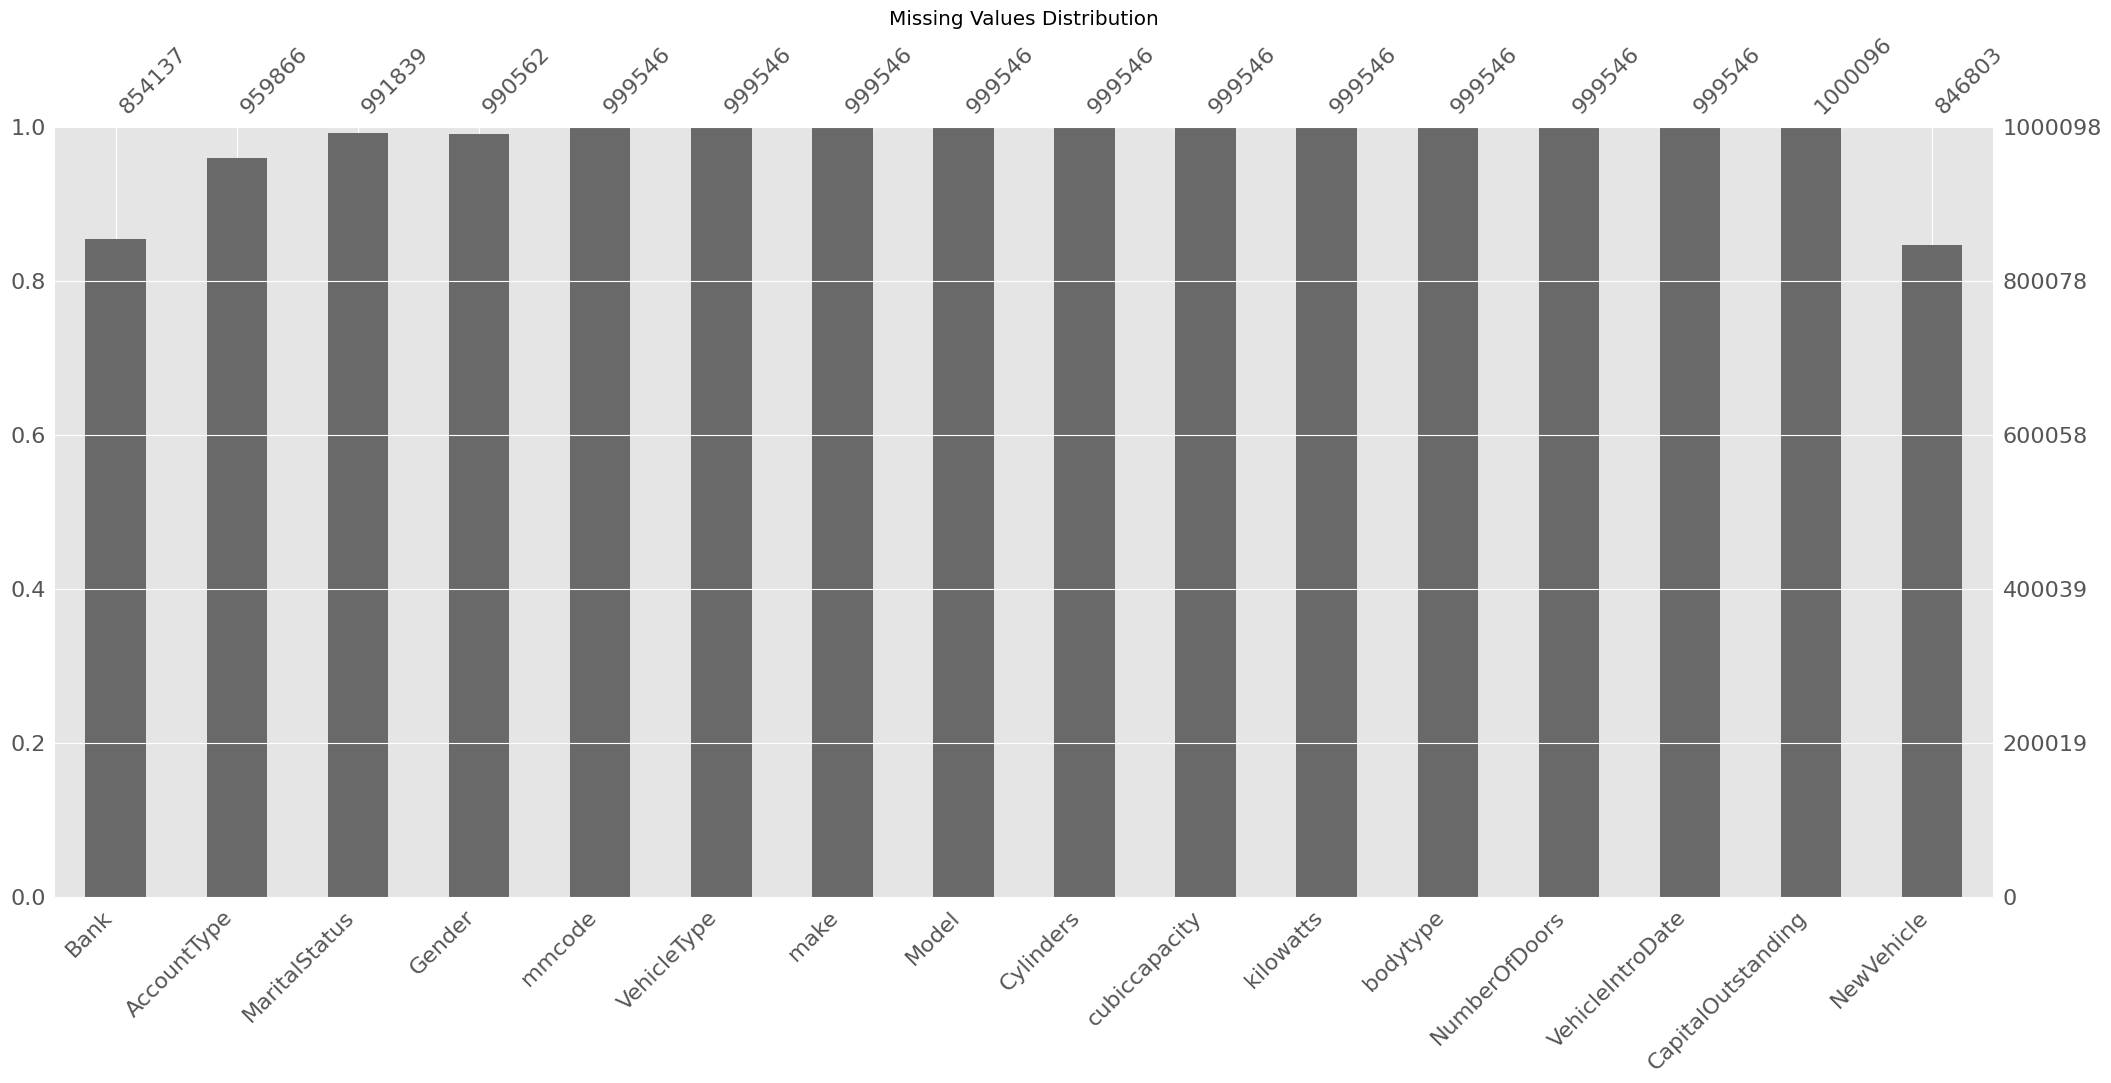

In [21]:
msno.bar(data[data.columns[data.isna().any()]])
plt.title("Missing Values Distribution")
plt.show()

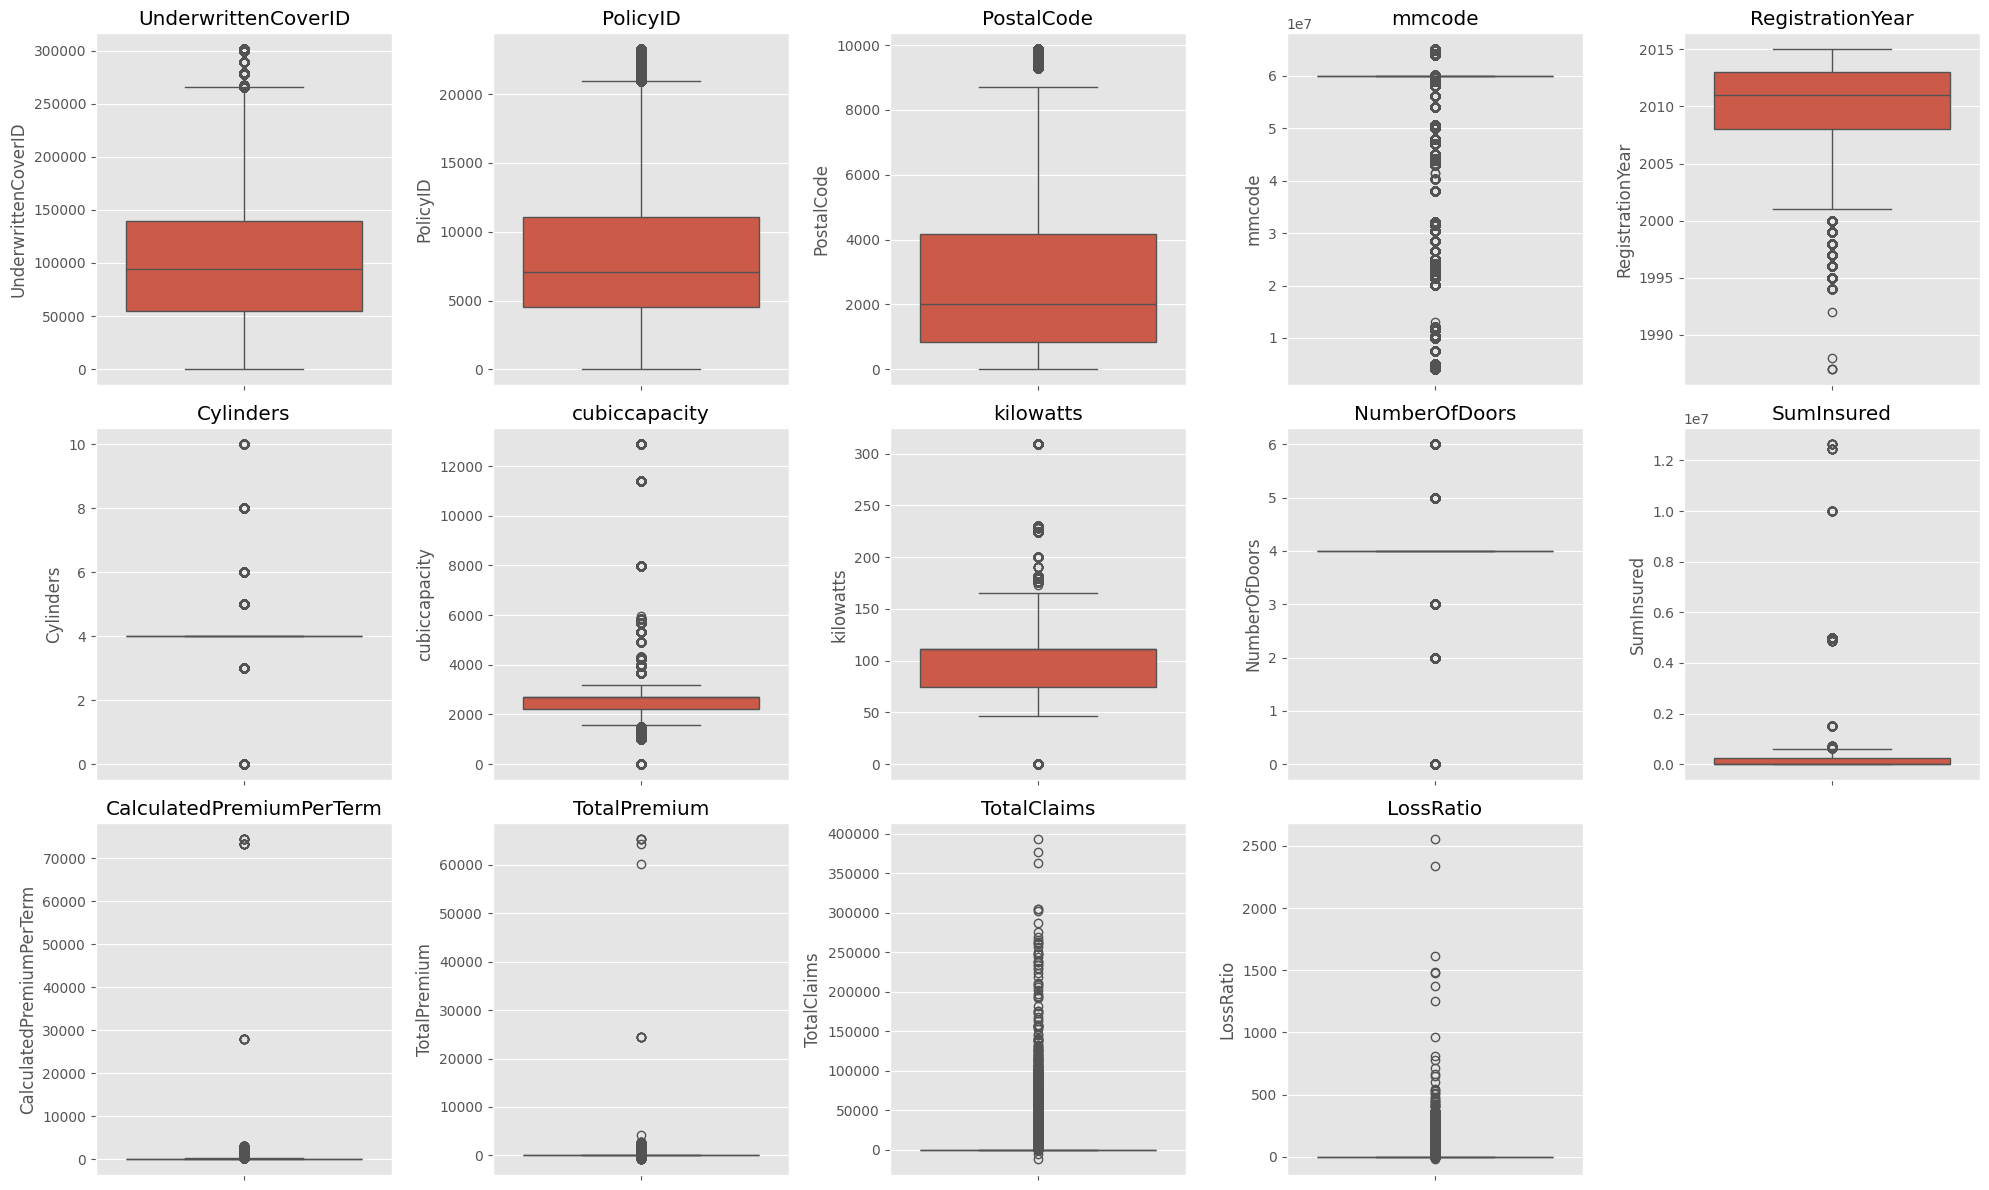

In [22]:
numerical_cols = data_clean.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(20, 12))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot((len(numerical_cols)//5)+1, 5, i)
    sns.boxplot(y=data_clean[col])
    plt.title(col)
plt.tight_layout()
plt.show()

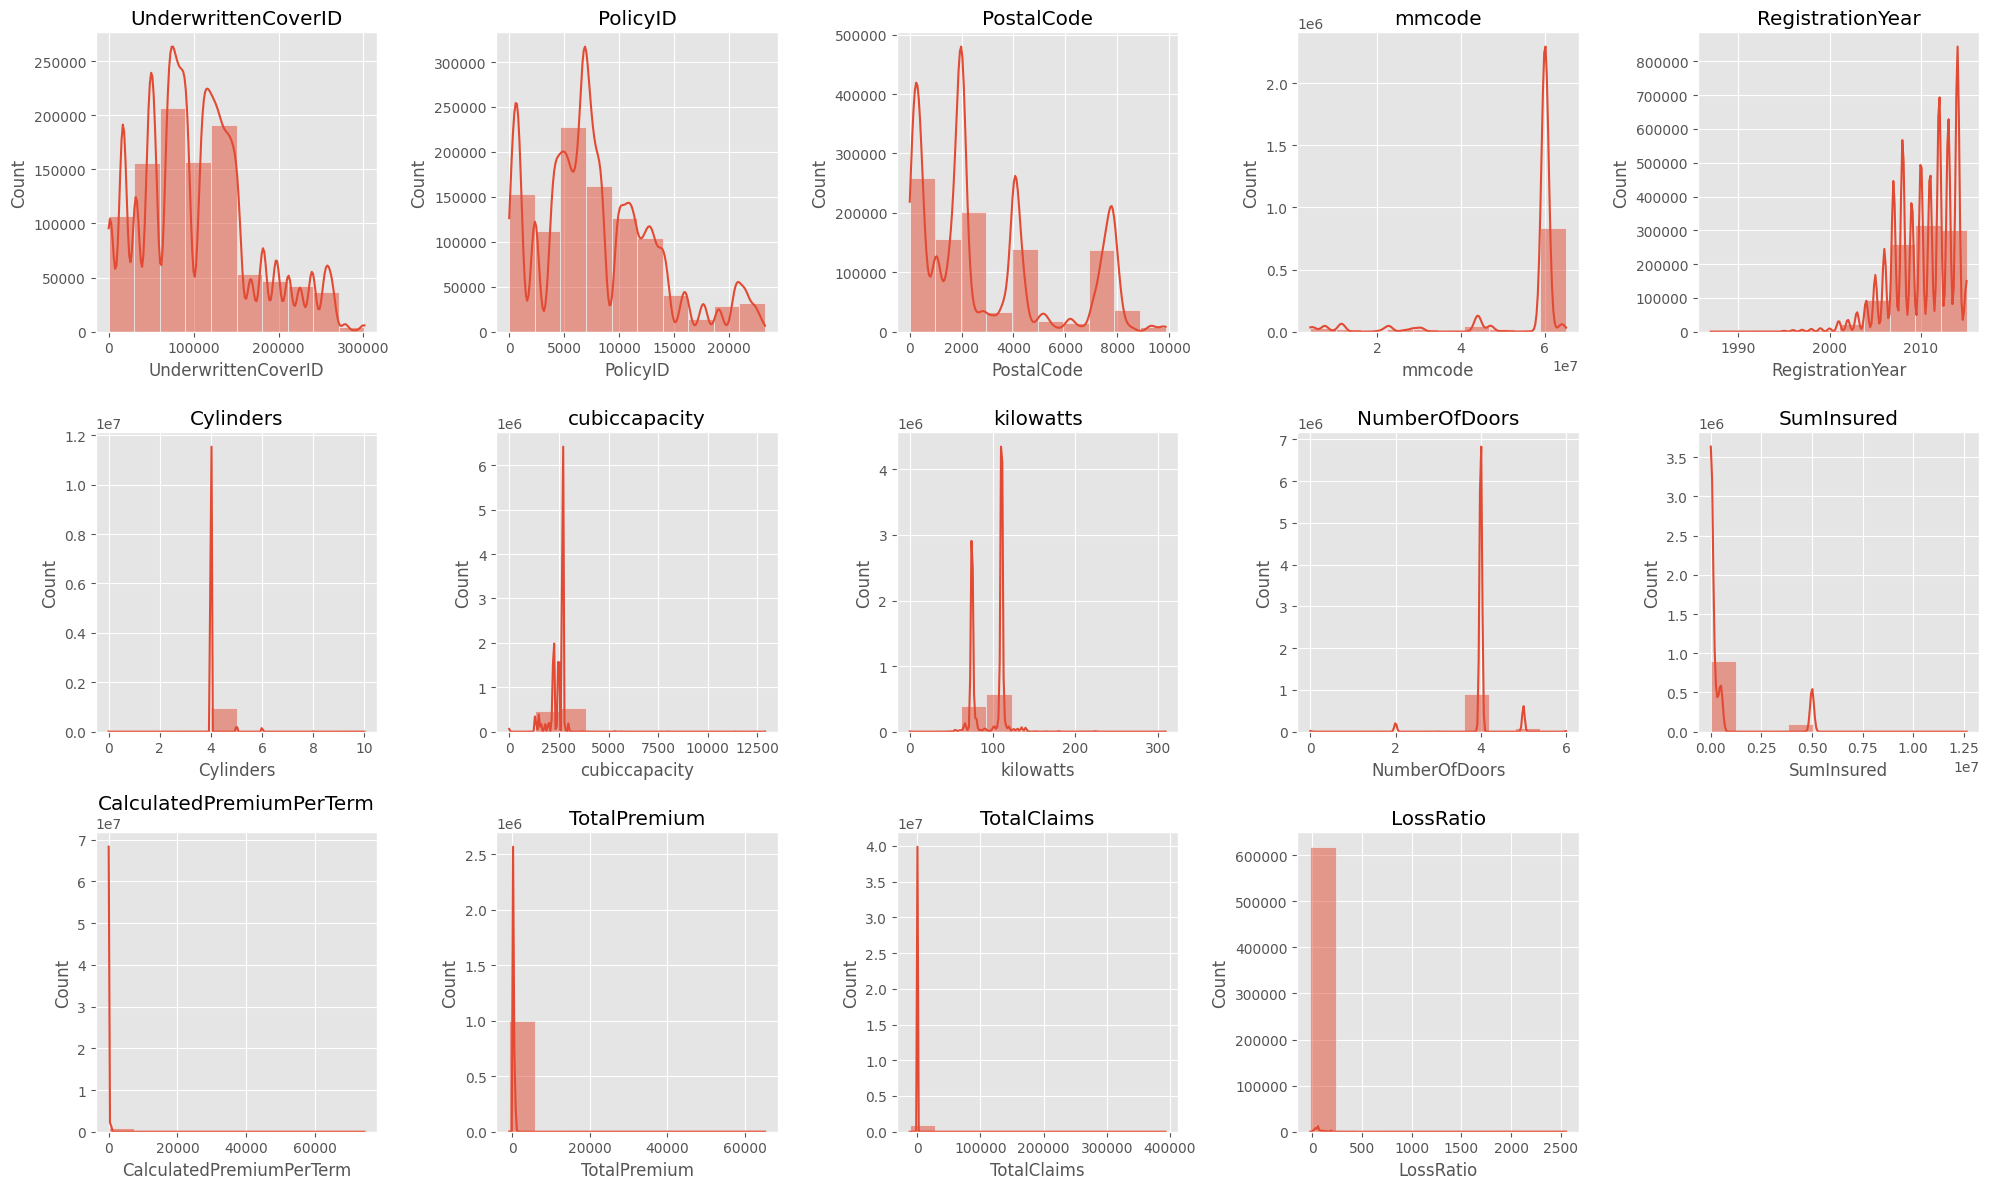

In [24]:
plt.figure(figsize=(20, 12))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot((len(numerical_cols)//5)+1, 5, i)
    sns.histplot(data_clean[col], bins=10, kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

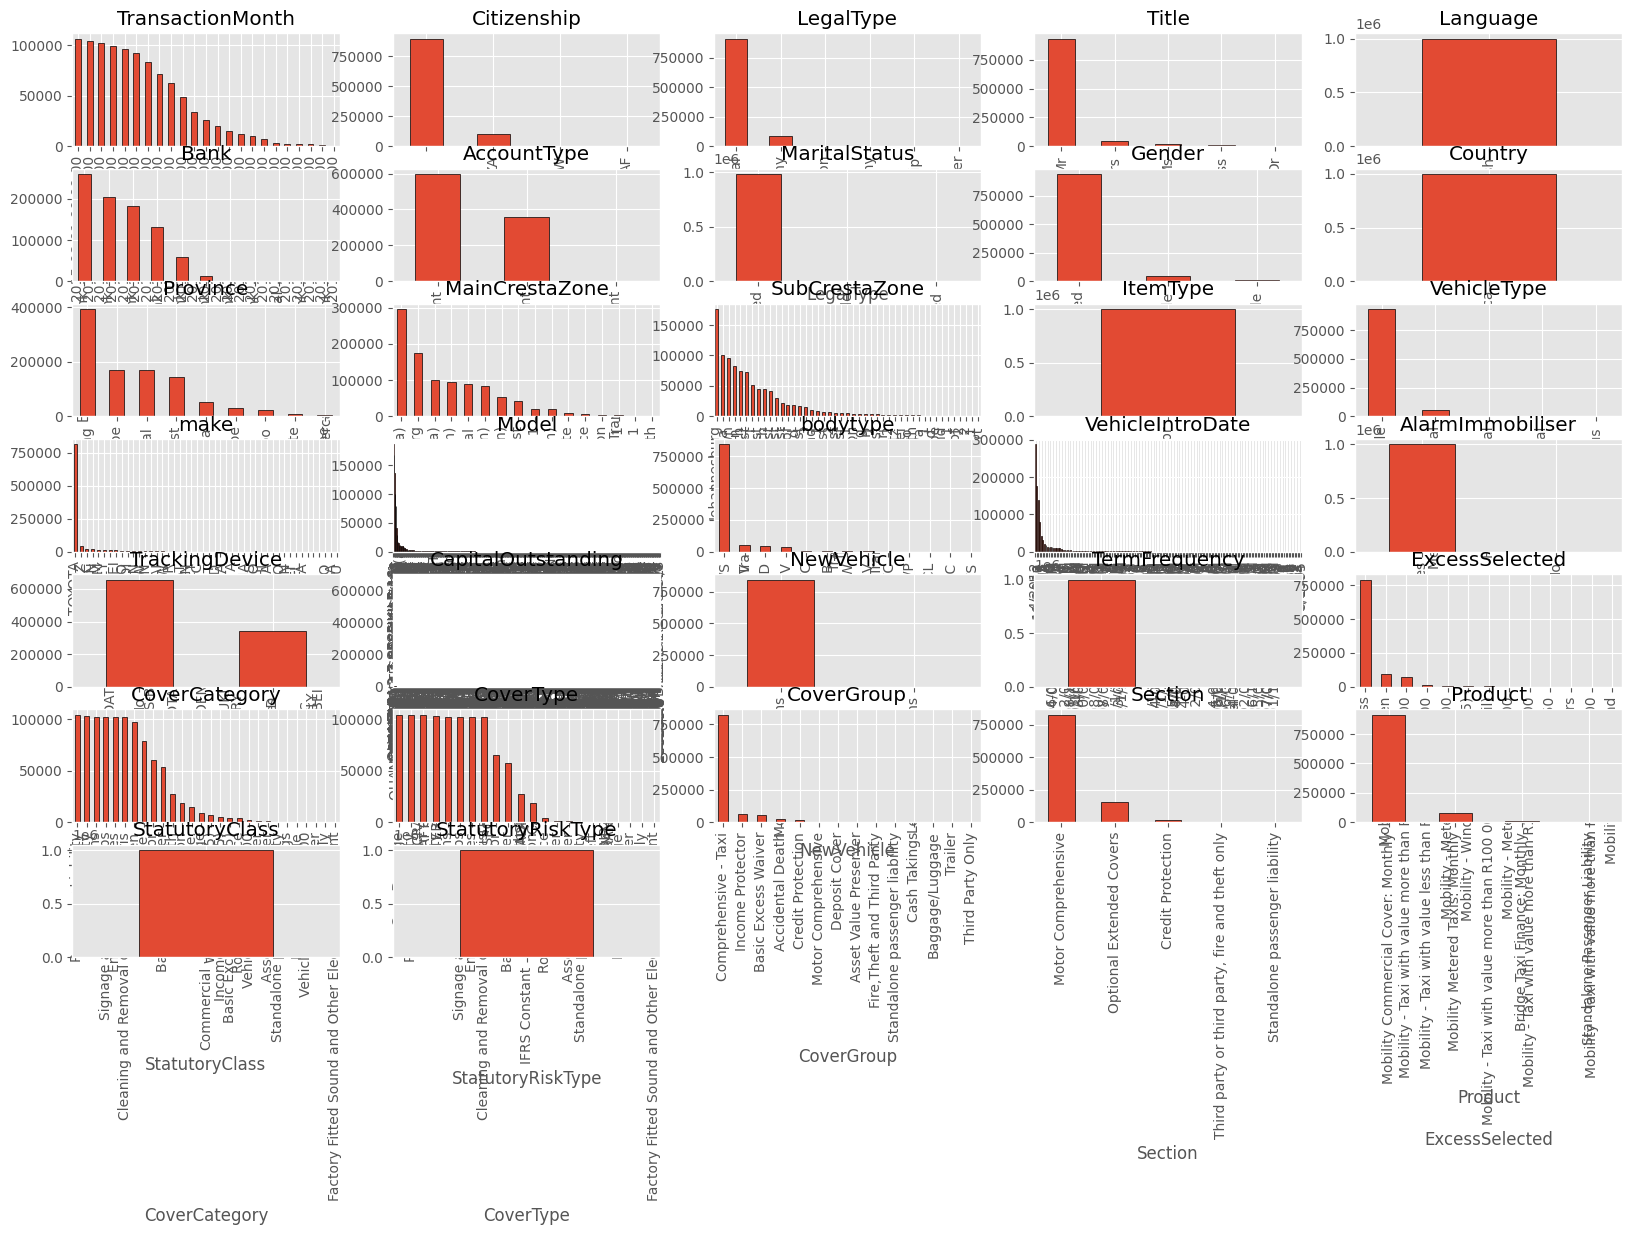

In [25]:
categorical_cols = data_clean.select_dtypes(include=['object']).columns
plt.figure(figsize=(20, 12))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot((len(categorical_cols)//5)+1, 5, i)
    data_clean[col].value_counts().plot(kind='bar', edgecolor='black')
    plt.title(col)
plt.tight_layout()
plt.show()


In [26]:
data_clean['Gender'] = data_clean['Title'].apply(lambda x: 'Female' if x in ['Mrs', 'Ms', 'Miss'] else 'Male' if x == 'Mr' else np.nan)
data_clean['MaritalStatus'] = data_clean['Title'].apply(lambda x: 'Married' if x == 'Mrs' else 'Single' if x == 'Miss' else np.nan)

In [27]:
def remove_outliers(df, exclude_cols=[]):
    numeric_cols = df.select_dtypes(include='float64').columns.difference(exclude_cols)
    
    Q1 = df[numeric_cols].quantile(0.25)
    Q3 = df[numeric_cols].quantile(0.75)
    IQR = Q3 - Q1
    
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    
    df[numeric_cols] = df[numeric_cols].clip(lower, upper, axis=1)
    return df

In [29]:
data_clean = remove_outliers(data.copy(), exclude_cols=['ID'])